Income-Expenditure Dataset
1. Income & Expenditure
What is the mean, median, and mode of Mthly_HH_Income?
Compare the mean and median of Mthly_HH_Expense. What does this tell you about expenditure distribution?
Find the range of monthly household income.
Which household has the highest income-to-expense ratio?
2. Family Structure
What is the average number of family members per household?
Find the standard deviation of No_of_Fly_Members. Is family size consistent across households?
Compare No_of_Earning_Members with No_of_Fly_Members. Which household has the highest dependency ratio (non-earning ÷ total members)?
3. Housing & EMI
What is the average EMI or rent amount as a percentage of monthly income?
Identify households where Emi_or_Rent_Amt exceeds 40% of Mthly_HH_Income.
Which household has the lowest disposable income (Mthly_HH_Income - Mthly_HH_Expense - Emi_or_Rent_Amt)?
4. Annual Income & Qualification
Verify whether Annual_HH_Income is consistent with Mthly_HH_Income × 12. If not, identify discrepancies.
Group households by Highest_Qualified_Member (e.g., Graduate, Postgraduate, PhD). What is the average monthly income in each group?
Does higher qualification correlate with higher household income? Support with mean/median values.
5. Outliers & Correlation
Detect outliers in Mthly_HH_Income using the Z-score method.
Compute the correlation between Mthly_HH_Income and Mthly_HH_Expense. Is the relationship strong?
Is there a significant correlation between No_of_Earning_Members and Mthly_HH_Income?


In [1]:
from google.colab import files
uploaded=files.upload()

Saving Inc_Exp_Data.csv to Inc_Exp_Data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("Inc_Exp_Data.csv")
df.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [5]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [6]:
df.isnull().sum()

,0
Mthly_HH_Income,0
Mthly_HH_Expense,0
No_of_Fly_Members,0
Emi_or_Rent_Amt,0
Annual_HH_Income,0
Highest_Qualified_Member,0
No_of_Earning_Members,0


In [7]:
df.shape

(50, 7)

In [8]:
# to get summary of character coloumns
df.describe(include=['object'])

,Highest_Qualified_Member
count,50
unique,5
top,Graduate
freq,19


In [9]:
# summary statistics of all coloumns
df.describe(include='all')

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50,50.000000
unique,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,Graduate,NaN
freq,NaN,NaN,NaN,NaN,NaN,19,NaN
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,NaN,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,NaN,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,NaN,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,NaN,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,NaN,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,NaN,2.000000


In [12]:
monthly_income_mean=df['Mthly_HH_Income'].mean()
monthly_income_median=df['Mthly_HH_Income'].median()
monthly_income_mode=df['Mthly_HH_Income'].mode()

In [14]:
print(" monthly income mean is : ", monthly_income_mean)
print(" monthly income median is : ", monthly_income_median)
print(" monthly income mode is : ", monthly_income_mode)

 monthly income mean is :  41558.0
 monthly income median is :  35000.0
 monthly income mode is :  0    45000
Name: Mthly_HH_Income, dtype: int64


In [ ]:
# from the above we can see that mode>mean>median which means this is like kind of negative skewnwss but not exactly as mode is greater here
#lets plot and see

/tmp/ipython-input-47663723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,bins=10,hist=True,kde=True,label='monthly income')


<Axes: xlabel='Mthly_HH_Income', ylabel='Density'>

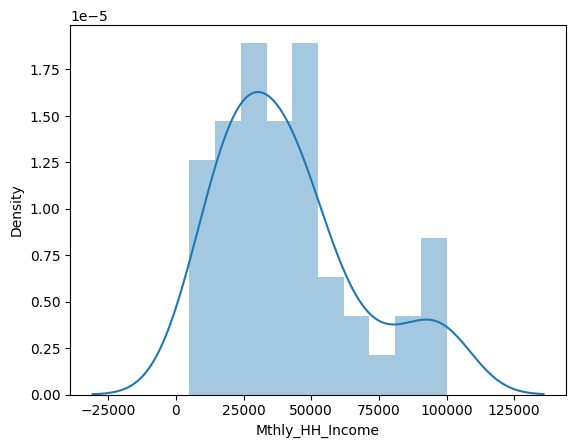

In [15]:
data=df['Mthly_HH_Income']
sns.distplot(data,bins=10,hist=True,kde=True,label='monthly income')

In [17]:
# Find the range of monthly household income
max_range=df['Annual_HH_Income'].max()
min_range=df['Annual_HH_Income'].min()
range_of_household=max_range-min_range
print(range_of_household)

# or do this direct as well : df['Annual_HH_Income'].max() - df['Annual_HH_Income'].min()

1339800


In [20]:
#Which household has the highest income-to-expense ratio?
df['income_to_expense_ratio']=df['Mthly_HH_Income']//df['Mthly_HH_Expense']
print(df.head(10))

   Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0             5000              8000                  3             2000   
1             6000              7000                  2             3000   
2            10000              4500                  2                0   
3            10000              2000                  1                0   
4            12500             12000                  2             3000   
5            14000              8000                  2                0   
6            15000             16000                  3            35000   
7            18000             20000                  5             8000   
8            19000              9000                  2                0   
9            20000              9000                  4                0   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  \
0             64200           Under-Graduate                      1   
1             79920  

In [ ]:
#household 3 has highest income to expense ratio which is 5

In [27]:
#Family Structure What is the average number of family members per household?
print(df['No_of_Fly_Members'].mean())

4.06


In [26]:
#Find the standard deviation of No_of_Fly_Members. Is family size consistent across households?
print(df['No_of_Fly_Members'].std()) # no family size isnt consistent across households

1.5173822786601394


In [33]:
# Compare No_of_Earning_Members with No_of_Fly_Members.
# Which household has the highest dependency ratio (non-earning ÷ total members)?
number_of_earning_members=df['No_of_Earning_Members'].sum()
number_of_fly_members=df['No_of_Fly_Members'].sum()
print(number_of_earning_members)
print(number_of_fly_members)
#both are the same here the number
# we have to calculate non earning , total-earning
df['non_earning_members']=df['No_of_Fly_Members']-df['No_of_Earning_Members']

73
203


In [34]:
#dependency ratio
df['dependency_ratio']=df['non_earning_members']/df['No_of_Fly_Members']
df.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,income_to_expense_ratio,non_earning_members,dependency_ratio
0,5000,8000,3,2000,64200,Under-Graduate,1,0,2,0.666667
1,6000,7000,2,3000,79920,Illiterate,1,0,1,0.500000
2,10000,4500,2,0,112800,Under-Graduate,1,2,1,0.500000
3,10000,2000,1,0,97200,Illiterate,1,5,0,0.000000
4,12500,12000,2,3000,147000,Graduate,1,1,1,0.500000
5,14000,8000,2,0,196560,Graduate,1,1,1,0.500000
6,15000,16000,3,35000,167400,Post-Graduate,1,0,2,0.666667
7,18000,20000,5,8000,216000,Graduate,1,0,4,0.800000
8,19000,9000,2,0,218880,Under-Graduate,1,2,1,0.500000
9,20000,9000,4,0,220800,Under-Graduate,2,2,2,0.500000


In [37]:
#highest dependency
highest_dependency=df.loc[df['dependency_ratio'].idxmax()]
print(highest_dependency)
#idxmax() finds the row (household) with the highest ratio.

Mthly_HH_Income                  22000
Mthly_HH_Expense                 25000
No_of_Fly_Members                    6
Emi_or_Rent_Amt                  12000
Annual_HH_Income                279840
Highest_Qualified_Member    Illiterate
No_of_Earning_Members                1
income_to_expense_ratio              0
non_earning_members                  5
dependency_ratio              0.833333
Name: 11, dtype: object


In [41]:
#Housing & EMI What is the average EMI or rent amount as a percentage of monthly income?
df['housing_percent']=(df['Emi_or_Rent_Amt']/df['Mthly_HH_Income'])*100
average_emi=df['housing_percent'].mean()
print("Average % of income spent on housing:", average_emi)

Average % of income spent on housing: 12.694386798751193


In [43]:
#Identify households where Emi_or_Rent_Amt exceeds 40% of Mthly_HH_Income.
df[df['Emi_or_Rent_Amt']>0.4*df['Mthly_HH_Income']]

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,income_to_expense_ratio,non_earning_members,dependency_ratio,hosuing_percent,housing_percent
1,6000,7000,2,3000,79920,Illiterate,1,0,1,0.500000,50.000000,50.000000
6,15000,16000,3,35000,167400,Post-Graduate,1,0,2,0.666667,233.333333,233.333333
7,18000,20000,5,8000,216000,Graduate,1,0,4,0.800000,44.444444,44.444444
11,22000,25000,6,12000,279840,Illiterate,1,0,5,0.833333,54.545455,54.545455


In [47]:
#Which household has the lowest disposable income (Mthly_HH_Income - Mthly_HH_Expense - Emi_or_Rent_Amt)?
df['disposable_income']=df['Mthly_HH_Income']-df['Mthly_HH_Expense']-df['Emi_or_Rent_Amt']
df.loc[df['disposable_income'].idxmin()]

,6
Mthly_HH_Income,15000
Mthly_HH_Expense,16000
No_of_Fly_Members,3
Emi_or_Rent_Amt,35000
Annual_HH_Income,167400
Highest_Qualified_Member,Post-Graduate
No_of_Earning_Members,1
income_to_expense_ratio,0
non_earning_members,2
dependency_ratio,0.666667


In [49]:
#Annual Income & Qualification Verify whether Annual_HH_Income is consistent with Mthly_HH_Income × 12.
#If not, identify discrepancies
df['expected_income']=df['Mthly_HH_Income']*12
df['consistent_income']=df['expected_income']==df['Mthly_HH_Income'] # returns true if it matches or false

In [50]:
discrepancies=df[df['consistent_income']==False]
print(discrepancies)

    Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   

In [51]:
# Group households by Highest_Qualified_Member (e.g., Graduate, Postgraduate, PhD). What is the average monthly income in each group?
# Does higher qualification correlate with higher household income?
# Support with mean/median values.
avg_income_by_qualification=df.groupby('Highest_Qualified_Member')['Mthly_HH_Income'].mean()
print(avg_income_by_qualification)

Highest_Qualified_Member
Graduate          40921.052632
Illiterate        25280.000000
Post-Graduate     59166.666667
Professional      52550.000000
Under-Graduate    29350.000000
Name: Mthly_HH_Income, dtype: float64


In [ ]:
# yes higher qualification corelates with higher household income

In [ ]:
#Outliers & Correlation Detect outliers in Mthly_HH_Income using the Z-score method. Compute the correlation between Mthly_HH_Income and Mthly_HH_Expense.
#Is the relationship strong? c
#Is there a significant correlation between No_of_Earning_Members and Mthly_HH_Income?

In [55]:
from scipy import stats
#calculate z scores for monthly income
df['income_zscore']=stats.zscore(df['Mthly_HH_Income'])
#filter outliers - If |Z| > 3 → usually considered an outlier.
outliers=df[df['income_zscore'].abs()>3]
print(outliers)

Empty DataFrame
Columns: [Mthly_HH_Income, Mthly_HH_Expense, No_of_Fly_Members, Emi_or_Rent_Amt, Annual_HH_Income, Highest_Qualified_Member, No_of_Earning_Members, income_to_expense_ratio, non_earning_members, dependency_ratio, hosuing_percent, housing_percent, disposable_income, expected_income, consistent_income, income_zscore]
Index: []


In [ ]:
# WE HAVE NO OUTLIERS IN THIS DATASET SHOWING THAT THE DATASET IS CLEAN ENOUGH
#No household has a Mthly_HH_Income that is more than 3 standard deviations away from the mean.

In [56]:
corr_earning_income=df['No_of_Earning_Members'].corr(df['Mthly_HH_Income'])
print("Correlation between earning members and income:", corr_earning_income)

Correlation between earning members and income: 0.34788345602238385


In [ ]:
#HERE THE CORELATION IS VERY WEAK AS ITS AROUND 0.3
# EXAMPLES OF STRONG AND WEAK AND MEDIUM
# IF Correlation between income and expense: 0.82  → Strong positive relationship
# IF Correlation between earning members and income: 0.45 → Moderate positive relationship

In [58]:
corr_earning_expense=df['Mthly_HH_Expense'].corr(df['Mthly_HH_Income'])
print("Correlation between earning members and income:", corr_earning_expense)

Correlation between earning members and income: 0.6492152549316462


In [ ]:
#THERE IS A MODERATE CORRELATION BETWEEN MONTHLY INCOME AND MONTHLY EXPENDITURE